In [452]:
import pandas as pd
import numpy as np
import os
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.base import BaseEstimator
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.ndimage.interpolation import shift

In [257]:
data = pd.read_csv("train.csv")

In [258]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
data.shape

(42000, 785)

In [260]:
label = data["label"]

In [261]:
data = data.drop(data.columns[0], axis=1)

In [262]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [263]:
label.shape

(42000,)

In [264]:
X, y = data, label
X = X.as_matrix()

In [265]:
X.shape

(42000, 784)

In [266]:
y.shape

(42000,)

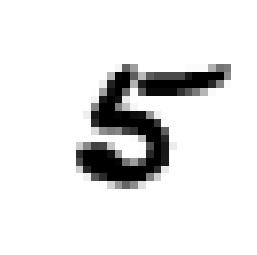

In [267]:
#check a image
some_digit = X[35002]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()


In [268]:
y[36000]

1

In [269]:
test = pd.read_csv("test.csv")

In [270]:
test.shape

(28000, 784)

In [271]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
test = test.as_matrix()

In [273]:
#split the train and test data set
X_train, X_test = X[:35700], X[35700:]

In [274]:
#split the train and test data set for label
y_train, y_test = y[:35700], y[35700:]

In [275]:
#shuffle the data
shuffle_index = np.random.permutation(35700)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [276]:
#let use binary classifer for one instance (5)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [277]:
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

In [278]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [279]:
sgd_clf.predict([some_digit])

array([False])

In [280]:
y[28025]

5

In [281]:
sgd_clf.predict([X[28025]])

array([ True])

In [282]:
#measuring accuracy for classifier that classify "5"
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96319637, 0.96773109, 0.92074964])

In [283]:
#measuring accuracy for classifier that classify "not 5", shows when the dataset is skewed, 
#the accuracy is not a preferred preferred measurement
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90394958, 0.91176471, 0.91134454])

In [284]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [285]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [286]:
confusion_matrix(y_train_5, y_train_pred)

array([[31377,  1075],
       [  690,  2558]])

In [287]:
#TP/(TP+FP)
#when it claims an image represents a 5, it is correct only 76% of the time
precision_score(y_train_5, y_train_pred)

0.7041012936966694

In [288]:
#TP/(TP+FN)
#it detects 81% of the 5s. 
recall_score(y_train_5, y_train_pred)

0.7875615763546798

In [289]:
f1_score(y_train_5, y_train_pred)

0.743496584798721

In [290]:
#check the score for a sgdclassifier on a specific observation (1)
y_scores = sgd_clf.decision_function([some_digit])

In [291]:
y_scores

array([-36785.11877961])

In [292]:
threshold = 0

In [293]:
y_some_digit_pred = (y_scores > threshold)

In [294]:
y_some_digit_pred

array([False])

In [295]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [296]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [297]:
y_scores

array([-1379235.86734085,  -967219.59986081,  -596205.63249578, ...,
        -319332.78459788,  -837095.10918706,  -523142.15761878])

In [298]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

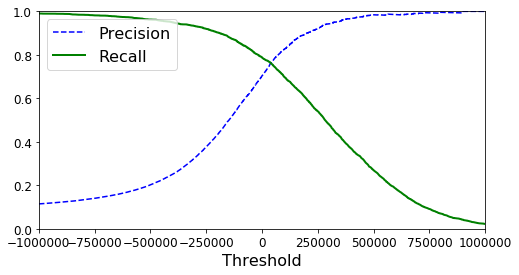

In [299]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1], "b--", label="Precision" )
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-1000000, 1000000])
plt.show()

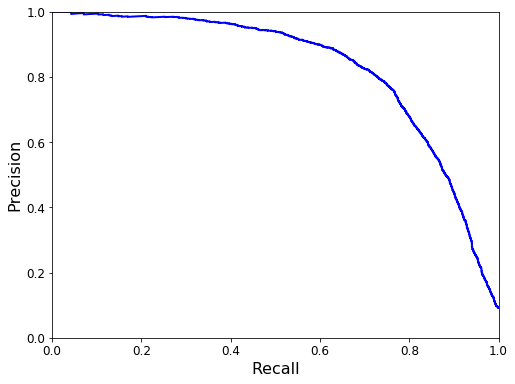

In [300]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [301]:
#try to select 90% precision
y_train_pred_90 = (y_scores > 200000)

In [302]:
precision_score(y_train_5, y_train_pred_90)

0.898975791433892

In [303]:
recall_score(y_train_5, y_train_pred_90)

0.5945197044334976

In [304]:
#ROC corve = tpr vs fpr
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

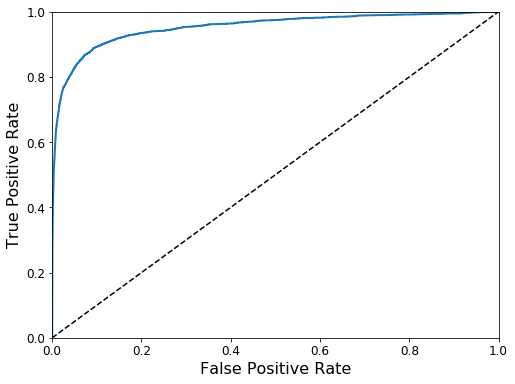

In [305]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [306]:
#AUC = area under the curve
roc_auc_score(y_train_5, y_scores)

0.9523843266963743

In [307]:
#lets compare AUC for randomforest and StochasticGradientDescent classificier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [308]:
#calculate the score for randomforest classifier
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

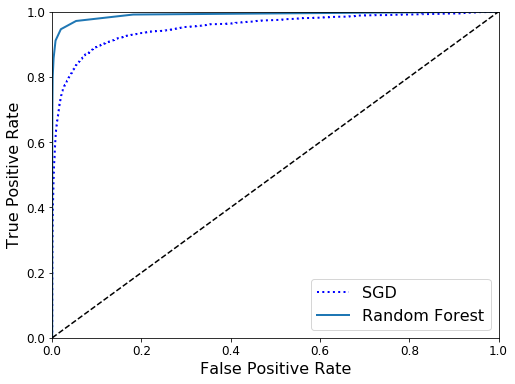

In [309]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [310]:
roc_auc_score(y_train_5, y_scores_forest)

0.9904949282046875

In [311]:
#precision score for randomforest
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9874237804878049

In [312]:
#recall score for radomforest
recall_score(y_train_5, y_train_pred_forest)

0.7977216748768473

In [313]:
#Multiclass classification
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [314]:
sgd_clf.predict([some_digit])

array([5])

In [315]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [316]:
some_digit_scores

array([[ -346781.15598024,  -949435.77173537,   -80448.67849037,
         -797625.97304226,  -461025.27785988,   -36785.11877961,
         -727404.4129507 , -1148558.46532969,  -106519.20249314,
        -1054155.11969608]])

In [317]:
#argmax returns the position of the largest value
np.argmax(some_digit_scores) 

5

In [318]:
#when the classifier is trained, it stores the list of target classes 
#in its classes_ attribute
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [319]:
sgd_clf.classes_[5]

5

In [320]:
#to force to use OneVsOneClassifier or OneVsRestClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42, max_iter=5, tol=-np.infty))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])


array([5])

In [321]:
len(ovo_clf.estimators_)

45

In [322]:
#train the RandomForestClassifier
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [323]:
forest_clf.predict([some_digit])

array([5])

In [324]:
#check the probability for each instances
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [325]:
#evaluating the SGDClassifier accuracy
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.86669467, 0.87931759, 0.86264291])

In [326]:
#to improve the result, we can standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90558589, 0.9080595 , 0.91131473])

In [389]:
#Error analysis
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [390]:
conf_mx = confusion_matrix(y_train, y_train_prep)

In [391]:
conf_mx

array([[3372,    2,   12,    8,    4,   27,   42,    4,   13,    3],
       [   0, 3826,   25,   18,    2,   13,    6,    6,   72,    3],
       [  33,   27, 3201,   59,   55,   13,   55,   35,   89,   13],
       [  25,   21,   74, 3221,    3,  160,   31,   27,   83,   58],
       [  16,   18,   23,    6, 3153,    5,   27,   19,   39,  127],
       [  54,   35,   18,  106,   41, 2760,   65,   24,   86,   59],
       [  28,   14,   21,    0,   23,   60, 3330,    4,   22,    0],
       [  21,   17,   47,   19,   38,    9,    4, 3451,    9,  155],
       [  33,   77,   35,  109,    9,  100,   31,   19, 2939,   87],
       [  31,   21,   11,   59,   97,   15,    0,  120,   39, 3174]])

In [392]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    plt.ylabel('actual')
    plt.xlabel('predicted')
    ax = fig.add_subplot(111)
    ax.xaxis.set_label_position('top') 
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

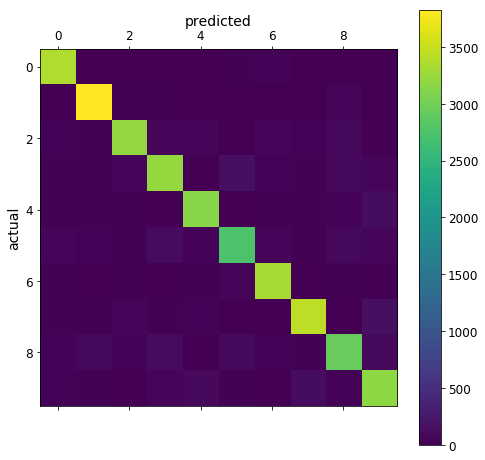

In [393]:
plot_confusion_matrix(conf_mx)

In [394]:
#to find the error rate, we divide each value in the 
#ocnfusion matrix by the number of images in the corresponding class
row_sums = conf_mx.sum(axis = 1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

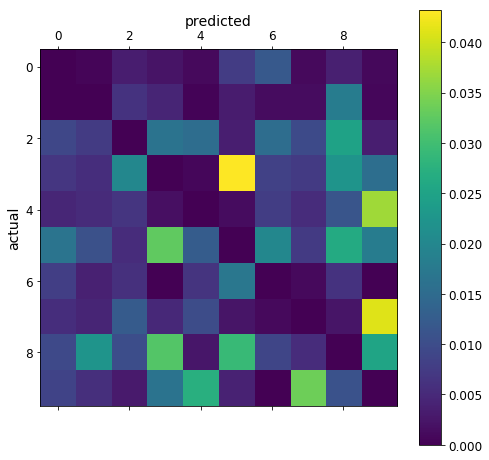

In [395]:
#fill the diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)
plot_confusion_matrix(norm_conf_mx)

In [396]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

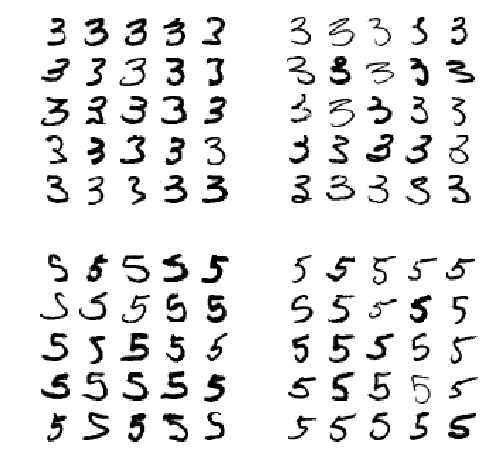

In [397]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a).values & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a).values & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b).values & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b).values & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [404]:
#Multilabel classification
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd] 

In [421]:
#KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [422]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
#F1 scores across all labels
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

In [407]:
#Multioutput classification
#adding noise by np's randint(), and clean up the noise by knnClassifier
noise = np.random.randint(0,100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [418]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

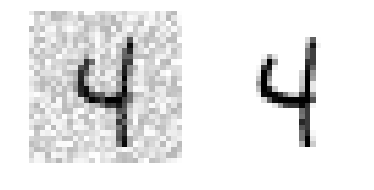

In [419]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

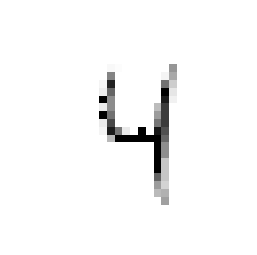

In [420]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digits(clean_digit)

In [426]:
#Try to build a classifier for the MNIST dataset 
#that achieves over 97% accuracy on the test set.
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [ ]:
#GridSearchCV
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

In [427]:
y_knn_pred = knn_clf.predict(X_test)
accuracy_score(y_test,y_knn_pred)

0.9706349206349206

In [429]:
#Write a function that can shift an MNIST image in any direction 
#(left, right, up, or down) by one pixel.5 Then, for each image in the 
#training set, create four shif‐ ted copies (one per direction) 
#and add them to the training set. Finally, train your best model on 
#this expanded training set and measure its accuracy on the test set.
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

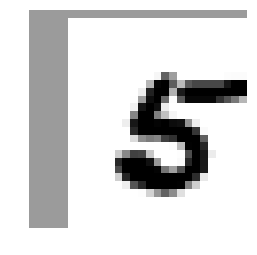

In [433]:
plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [435]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

In [444]:
X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((178500, 784), (178500,))

In [446]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [448]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [449]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9765079365079365

In [450]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

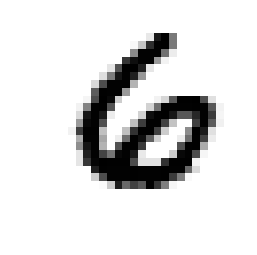

In [451]:
plot_digit(ambiguous_digit)